<font size="+2" color="blue">Additional Results: Model Purchased Device</font>

Author: <font color="blue">Roj Gian Gorospe</font>

E-mail: <font color="blue">rojgian.gorospe.cics@ust.edu.ph</font>

Date: <font color="blue">February 8, 2025</font>

# Practice Session 01+02: Data preparation

# 1. Exploratory data analysis 

In [1]:
import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [3]:
input_dataset.head(5)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [4]:

# Create empty array to store the data
data = []

# Loop through each column in the dataset and store the column name, data type, and number of distinct elements
for column in input_dataset.columns:
  data.append({
    "column_name": column,
    "column_type": input_dataset[column].dtype,
    "distinct_elements": input_dataset[column].nunique()
  })

#Display the data in a DataFrame
column_type_df = pd.DataFrame(data)
display(column_type_df)

,column_name,column_type,distinct_elements
0,PURCHASED_DEVICE,object,101
1,DEVICE_VALUE,float64,368
2,LAST_DEVICE_CHANGE,float64,76
3,DATA_TRAFFIC_MONTH_1,float64,7215
4,DATA_TRAFFIC_MONTH_2,float64,7182
5,DATA_TRAFFIC_MONTH_3,float64,7176
6,DATA_TRAFFIC_MONTH_4,float64,7124
7,DATA_TRAFFIC_MONTH_5,float64,7173
8,DATA_TRAFFIC_MONTH_6,float64,7074
9,VOICE_TRAFFIC_MONTH_1,float64,3550


In [5]:

# Create empty array to store the data
temp_data = []

# Loop through each column in the dataset and store the column name, float64 data types only, and its corresponding mean, median, min, max computed while ignoring the NaN values

for column in input_dataset.columns:
  if input_dataset[column].dtype == 'float64':
    temp_data.append({
      "column_name": column,
      "column_type": input_dataset[column].dtype,
      "mean": np.nanmean(input_dataset[column]),
      "median": np.nanmedian(input_dataset[column]),
      "min": np.nanmin(input_dataset[column]),
      "max": np.nanmax(input_dataset[column])
    })

#Display the data in a DataFrame
column_type_info_df = pd.DataFrame(temp_data)
pd.options.display.float_format = '{:.2f}'.format

display(column_type_info_df)



,column_name,column_type,mean,median,min,max
0,DEVICE_VALUE,float64,750.48,393.00,15.00,9057.00
1,LAST_DEVICE_CHANGE,float64,20166984.77,20170601.00,20121001.00,20190501.00
2,DATA_TRAFFIC_MONTH_1,float64,3481.83,1208.73,0.00,127017.59
3,DATA_TRAFFIC_MONTH_2,float64,3649.96,1294.95,0.00,111948.84
4,DATA_TRAFFIC_MONTH_3,float64,3653.43,1310.67,0.00,111948.84
5,DATA_TRAFFIC_MONTH_4,float64,3269.44,1176.54,0.00,87856.41
6,DATA_TRAFFIC_MONTH_5,float64,3673.37,1287.09,0.00,121834.81
7,DATA_TRAFFIC_MONTH_6,float64,3427.69,1277.12,0.00,90550.61
8,VOICE_TRAFFIC_MONTH_1,float64,154.85,84.05,0.00,4220.10
9,VOICE_TRAFFIC_MONTH_2,float64,142.57,74.90,0.00,3132.10


In [6]:

# Create empty array to store the data
column_data = []

# Loop through each column in the dataset and store the column name, float64 data types only, and its corresponding mean, median, min, max computed while ignoring the NaN values
for column in input_dataset.columns:
  column_data.append({
    "column_name": column,
    "description": input_dataset[column].describe(),
    })

#Display the data in a DataFrame
column_describe_df = pd.DataFrame(column_data)
pd.options.display.float_format = '{:.2f}'.format

display(column_describe_df)



,column_name,description
0,PURCHASED_DEVICE,count ...
1,DEVICE_VALUE,count 9690.00 mean 750.48 std 979.7...
2,LAST_DEVICE_CHANGE,count 7682.00 mean 20166984.77 std ...
3,DATA_TRAFFIC_MONTH_1,count 8868.00 mean 3481.83 std ...
4,DATA_TRAFFIC_MONTH_2,count 8841.00 mean 3649.96 std ...
5,DATA_TRAFFIC_MONTH_3,count 8846.00 mean 3653.43 std ...
6,DATA_TRAFFIC_MONTH_4,count 8817.00 mean 3269.44 std 567...
7,DATA_TRAFFIC_MONTH_5,count 8866.00 mean 3673.37 std ...
8,DATA_TRAFFIC_MONTH_6,count 8535.00 mean 3427.69 std 588...
9,VOICE_TRAFFIC_MONTH_1,count 8868.00 mean 154.85 std 218.2...


In [7]:

# Compute the count of non-NaN values in DURATION_LINE using two approaches:
custom_count = input_dataset['DURATION_LINE'].count()
describe_count = input_dataset['DURATION_LINE'].describe()['count']

print("Custom computed count (non-NaN):", custom_count)
print("Describe count:", describe_count)


Custom computed count (non-NaN): 9179
Describe count: 9179.0


        Custom  Describe
mean     62.37     62.37
median   48.00     48.00
min       0.00      0.00
max     320.00    320.00


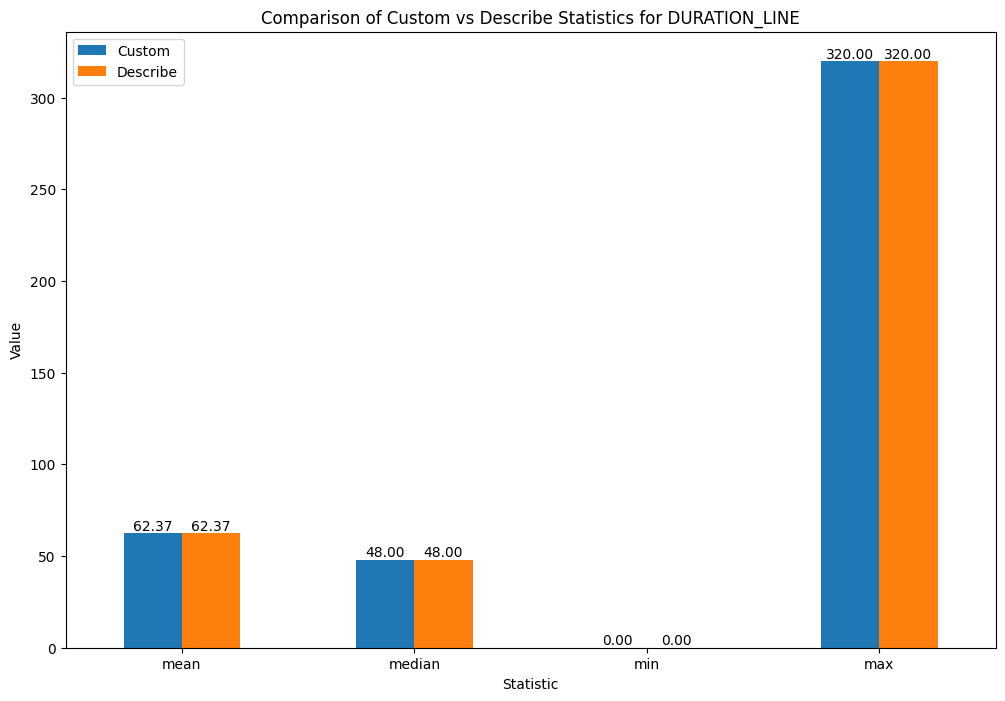

In [8]:



# Extract custom statistics for DURATION_LINE from column_type_info_df
custom_stats = column_type_info_df.loc[
  column_type_info_df['column_name'] == 'DURATION_LINE', 
  ['mean', 'median', 'min', 'max']
].iloc[0]

# Compute describe statistics from the input_dataset for DURATION_LINE
describe_stats = input_dataset['DURATION_LINE'].describe()
# Rename the '50%' value to 'median'
describe_stats = describe_stats[['mean', 'min', '50%', 'max']].rename({'50%': 'median'})

# Create a comparison dataframe using both
comparison_df = pd.DataFrame({
  'Custom': custom_stats,
  'Describe': describe_stats
}).reindex(['mean', 'median', 'min', 'max'])

print(comparison_df)

ax = comparison_df.plot(kind='bar', rot=0, figsize=(12, 8))
plt.title('Comparison of Custom vs Describe Statistics for DURATION_LINE')
plt.xlabel('Statistic')
plt.ylabel('Value')

# Annotate each bar with its value
for container in ax.containers:
  ax.bar_label(container, fmt='%.2f')
plt.show()


## 1.2. Inventory of device models

In [9]:
# Census for PREVIOUS_DEVICE_MODEL: frequency count sorted in descending order
census_model = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts().reset_index()
census_model.columns = ['PREVIOUS_DEVICE_MODEL', 'Frequency']
display(census_model)

# Census for PREVIOUS_DEVICE_BRAND: frequency count sorted in descending order
census_brand = input_dataset['PREVIOUS_DEVICE_BRAND'].value_counts().reset_index()
census_brand.columns = ['PREVIOUS_DEVICE_BRAND', 'Frequency']
display(census_brand)

,PREVIOUS_DEVICE_MODEL,Frequency
0,iPhone 7,425
1,iPhone 6,250
2,Samsung Galaxy J5,243
3,iPhone 6S,212
4,Samsung Galaxy J1 Mini,204
...,...,...
575,LG Optimus L3 II,1
576,"Lenovo S930,Lenovo S939",1
577,Samsung Corby II,1
578,SGH-U600,1


,PREVIOUS_DEVICE_BRAND,Frequency
0,Samsung,1877
1,Outros,1592
2,Apple,1548
3,Motorola,638
4,LG,514


In [10]:
# Count unique device model names for iPhone's
unique_iphone_models = input_dataset[input_dataset['PREVIOUS_DEVICE_MODEL'].str.startswith("iPhone", na=False)]['PREVIOUS_DEVICE_MODEL'].nunique()

# Count unique device model names for Samsung's
unique_samsung_models = input_dataset[input_dataset['PREVIOUS_DEVICE_MODEL'].str.startswith("Samsung", na=False)]['PREVIOUS_DEVICE_MODEL'].nunique()

print("Unique iPhone device models:", unique_iphone_models)
iphone_models = input_dataset[input_dataset['PREVIOUS_DEVICE_MODEL'].str.startswith("iPhone", na=False)]['PREVIOUS_DEVICE_MODEL'].unique()
display(iphone_models)


print("Unique Samsung device models:", unique_samsung_models)
samsung_models = input_dataset[input_dataset['PREVIOUS_DEVICE_MODEL'].str.startswith("Samsung", na=False)]['PREVIOUS_DEVICE_MODEL'].unique()
display(samsung_models)


Unique iPhone device models: 13


array(['iPhone 6', 'iPhone 6S', 'iPhone 4S', 'iPhone 7', 'iPhone 7 Plus',
       'iPhone 5S', 'iPhone SE', 'iPhone 6S Plus', 'iPhone 6 Plus',
       'iPhone 5C', 'iPhone 4', 'iPhone 5', 'iPhone 3GS'], dtype=object)

Unique Samsung device models: 100


array(['Samsung Galaxy J1 Mini', 'Samsung Galaxy J5',
       'Samsung Galaxy J1 2016', 'Samsung Galaxy S4 Mini',
       'Samsung Galaxy J7', 'Samsung Galaxy Gran Prime 2016',
       'Samsung Galaxy S7 Edge', 'Samsung Galaxy S III Neo Duos',
       'Samsung Galaxy J7 Prime', 'Samsung Galaxy S6',
       'Samsung Galaxy Young 2', 'Samsung Galaxy Grand Neo',
       'Samsung Galaxy A7 2016', 'Samsung Galaxy S7',
       'Samsung Galaxy Pocket 2 Duos', 'Samsung E1207',
       'Samsung Galaxy A9 Pro', 'Samsung Galaxy S5',
       'Samsung Galaxy Note 4', 'Samsung Galaxy A5',
       'Samsung Galaxy SIII', 'Samsung Galaxy Win Duos',
       'Samsung Galaxy Win 2', 'Samsung Galaxy Ace 4 Neo',
       'Samsung Galaxy S5 Mini', 'Samsung S III Mini Refresh',
       'Samsung Galaxy J7 2016', 'Samsung Galaxy J3 2016',
       'Samsung Galaxy J2', 'Samsung Galaxy Gran Prime', 'Samsung E1086',
       'Samsung Galaxy S5 Neo', 'Samsung Galaxy Gran Prime Duos',
       'Samsung Galaxy A7 2017', 'Samsung Galaxy 

Based on these data validation, the most common device model is not the same as the most common device brand due to the fact that Apple products are scarced and releases phone models rarely -- compared to the vast range of the Samsung brand where they release many models that better fits their target customers.

# 2. Feature engineering

## 2.1. Missing values management

In [11]:
#Get the percentage of NaN values in the dataset
nan_percent = input_dataset.isna().mean() * 100
columns_with_nan = nan_percent[nan_percent > 0]

# Display the columns with NaN values and their respective percentage
nan_columns_df = columns_with_nan.reset_index()
nan_columns_df.columns = ['Column', 'Percentage of NaN']
nan_columns_df['Percentage of NaN'] = nan_columns_df['Percentage of NaN'] / 100
nan_columns_df['Percentage of NaN'] = nan_columns_df['Percentage of NaN'].map('{:,.2%}'.format)
display(nan_columns_df)

,Column,Percentage of NaN
0,PURCHASED_DEVICE,1.47%
1,DEVICE_VALUE,3.10%
2,LAST_DEVICE_CHANGE,23.18%
3,DATA_TRAFFIC_MONTH_1,11.32%
4,DATA_TRAFFIC_MONTH_2,11.59%
5,DATA_TRAFFIC_MONTH_3,11.54%
6,DATA_TRAFFIC_MONTH_4,11.83%
7,DATA_TRAFFIC_MONTH_5,11.34%
8,DATA_TRAFFIC_MONTH_6,14.65%
9,VOICE_TRAFFIC_MONTH_1,11.32%


In [12]:
imputation_dataset = input_dataset.copy()

# Remove rows with missing PURCHASED_DEVICE, DEVICE_VALUE, or PREVIOUS_DEVICE_MODEL values
imputation_dataset.dropna(subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL'], inplace=True)

print("Shape of dataset before removing rows with missing required columns:", input_dataset.shape)
#print the new shape of the dataframe to verify the removal
print("Shape of dataset after removing rows with missing required columns:", imputation_dataset.shape)



Shape of dataset before removing rows with missing required columns: (10000, 33)
Shape of dataset after removing rows with missing required columns: (5988, 33)


In [13]:

# Check for NaNs in the specified columns and print percentages
cols_to_impute = [f"DATA_TRAFFIC_MONTH_{i}" for i in range(1, 7)] + \
         [f"VOICE_TRAFFIC_MONTH_{i}" for i in range(1, 7)] + \
         [f"BILLING_MONTH_{i}" for i in range(1, 7)] + \
         [f"DEVICE_COST_MONTH_{i}" for i in range(1, 7)]

# Calculate the percentage of NaN values per column
nan_percentages = imputation_dataset[cols_to_impute].isna().mean() * 100

# Convert the series to a DataFrame for a cleaner display
nan_percentage_df = nan_percentages.reset_index()
nan_percentage_df.columns = ['Column', 'NaN Percentage (%)']

print("NaN percentages per column:")
display(nan_percentage_df)


NaN percentages per column:


,Column,NaN Percentage (%)
0,DATA_TRAFFIC_MONTH_1,11.34
1,DATA_TRAFFIC_MONTH_2,11.51
2,DATA_TRAFFIC_MONTH_3,11.36
3,DATA_TRAFFIC_MONTH_4,11.59
4,DATA_TRAFFIC_MONTH_5,10.99
5,DATA_TRAFFIC_MONTH_6,15.10
6,VOICE_TRAFFIC_MONTH_1,11.34
7,VOICE_TRAFFIC_MONTH_2,11.51
8,VOICE_TRAFFIC_MONTH_3,11.36
9,VOICE_TRAFFIC_MONTH_4,11.59


In [14]:

# Define the list of columns to impute
cols_to_impute = [f"DATA_TRAFFIC_MONTH_{i}" for i in range(1, 7)] + \
         [f"VOICE_TRAFFIC_MONTH_{i}" for i in range(1, 7)] + \
         [f"BILLING_MONTH_{i}" for i in range(1, 7)] + \
         [f"DEVICE_COST_MONTH_{i}" for i in range(1, 7)]

# Fill NaN values with 0 for the chosen columns in the imputation_dataset DataFrame
imputation_dataset[cols_to_impute] = imputation_dataset[cols_to_impute].fillna(0)

# Optionally, display the count of NaNs in these columns to verify the imputation worked correctly
print("Number of missing values after imputation:")
print(imputation_dataset[cols_to_impute].isna().sum())


Number of missing values after imputation:
DATA_TRAFFIC_MONTH_1     0
DATA_TRAFFIC_MONTH_2     0
DATA_TRAFFIC_MONTH_3     0
DATA_TRAFFIC_MONTH_4     0
DATA_TRAFFIC_MONTH_5     0
DATA_TRAFFIC_MONTH_6     0
VOICE_TRAFFIC_MONTH_1    0
VOICE_TRAFFIC_MONTH_2    0
VOICE_TRAFFIC_MONTH_3    0
VOICE_TRAFFIC_MONTH_4    0
VOICE_TRAFFIC_MONTH_5    0
VOICE_TRAFFIC_MONTH_6    0
BILLING_MONTH_1          0
BILLING_MONTH_2          0
BILLING_MONTH_3          0
BILLING_MONTH_4          0
BILLING_MONTH_5          0
BILLING_MONTH_6          0
DEVICE_COST_MONTH_1      0
DEVICE_COST_MONTH_2      0
DEVICE_COST_MONTH_3      0
DEVICE_COST_MONTH_4      0
DEVICE_COST_MONTH_5      0
DEVICE_COST_MONTH_6      0
dtype: int64


In [15]:

# Check for NaNs in the specified columns and print percentages
cols_to_impute = [f"DATA_TRAFFIC_MONTH_{i}" for i in range(1, 7)] + \
         [f"VOICE_TRAFFIC_MONTH_{i}" for i in range(1, 7)] + \
         [f"BILLING_MONTH_{i}" for i in range(1, 7)] + \
         [f"DEVICE_COST_MONTH_{i}" for i in range(1, 7)]

# Calculate the percentage of NaN values per column
nan_percentages =imputation_dataset[cols_to_impute].isna().mean() * 100

# Convert the series to a DataFrame for a cleaner display
nan_percentage_df = nan_percentages.reset_index()
nan_percentage_df.columns = ['Column', 'NaN Percentage (%)']

print("NaN percentages per column:")
display(nan_percentage_df)


NaN percentages per column:


,Column,NaN Percentage (%)
0,DATA_TRAFFIC_MONTH_1,0.00
1,DATA_TRAFFIC_MONTH_2,0.00
2,DATA_TRAFFIC_MONTH_3,0.00
3,DATA_TRAFFIC_MONTH_4,0.00
4,DATA_TRAFFIC_MONTH_5,0.00
5,DATA_TRAFFIC_MONTH_6,0.00
6,VOICE_TRAFFIC_MONTH_1,0.00
7,VOICE_TRAFFIC_MONTH_2,0.00
8,VOICE_TRAFFIC_MONTH_3,0.00
9,VOICE_TRAFFIC_MONTH_4,0.00


In [16]:
missing_after = imputation_dataset['LINE_ACTIVATION_DATE'].isna().sum()
print("Number of missing values in LINE_ACTIVATION_DATE before imputation:", missing_after)

Number of missing values in LINE_ACTIVATION_DATE before imputation: 468


In [17]:

# Replace missing LINE_ACTIVATION_DATE values with values from LAST_DEVICE_CHANGE
imputation_dataset['LINE_ACTIVATION_DATE'] = imputation_dataset['LINE_ACTIVATION_DATE'].fillna(imputation_dataset['LAST_DEVICE_CHANGE'])

# Optionally, verify that no missing values remain in LINE_ACTIVATION_DATE
missing_after = imputation_dataset['LINE_ACTIVATION_DATE'].isna().sum()
print("Number of missing values in LINE_ACTIVATION_DATE after imputation:", missing_after)


Number of missing values in LINE_ACTIVATION_DATE after imputation: 124


## Upon reviewing the still missing values, the issue roots from the values for the 'LAST_DEVICE_CHANGE' sometimes containing NaN values themselves and having an improper date format. 

The code below solves the problem, but is commented out since it wasn't instructed to be done.

In [18]:
# # Drop rows with NaN in LAST_DEVICE_CHANGE
# imputation_dataset.dropna(subset=['LAST_DEVICE_CHANGE'], inplace=True)

# # Convert LAST_DEVICE_CHANGE from float to datetime format (%Y%m%d)
# imputation_dataset['LAST_DEVICE_CHANGE'] = imputation_dataset['LAST_DEVICE_CHANGE'].apply(
#   lambda x: pd.to_datetime(str(int(x)), format='%Y%m%d', errors='coerce')
# )

# # For LINE_ACTIVATION_DATE, first convert non-missing values from float to datetime
# imputation_dataset['LINE_ACTIVATION_DATE'] = imputation_dataset['LINE_ACTIVATION_DATE'].apply(
#   lambda x: pd.to_datetime(str(int(x)), format='%Y%m%d', errors='coerce') if pd.notna(x) else x
# )

# # Replace missing LINE_ACTIVATION_DATE with LAST_DEVICE_CHANGE values
# imputation_dataset['LINE_ACTIVATION_DATE'] = imputation_dataset['LINE_ACTIVATION_DATE'].fillna(imputation_dataset['LAST_DEVICE_CHANGE'])

# # Verify that no missing values remain in LINE_ACTIVATION_DATE
# missing_after = imputation_dataset['LINE_ACTIVATION_DATE'].isna().sum()
# print("Number of missing values in LINE_ACTIVATION_DATE after imputation:", missing_after)


In [19]:
# Get the number of rows in the original and new datasets
original_rows = input_dataset.shape[0]
new_rows = imputation_dataset.shape[0]

# Compute the percentage of rows dropped
dropped_pct = ((original_rows - new_rows) / original_rows) * 100

print(f"Rows in the original dataset: {original_rows}")
print(f"Rows in the new dataset: {new_rows} ({dropped_pct:.2f}% less)")

# Identify columns that still contain NaN values in the new dataset
columns_with_nan = imputation_dataset.columns[imputation_dataset.isna().any()]

if len(columns_with_nan) > 0:
  print("Columns with NaN values:", list(columns_with_nan))
else:
  print("No columns with NaN values remain.")


Rows in the original dataset: 10000
Rows in the new dataset: 5988 (40.12% less)
Columns with NaN values: ['LAST_DEVICE_CHANGE', 'LINE_ACTIVATION_DATE', 'MONTHS_LAST_DEVICE', 'DURATION_LINE']


## 2.2. Distributions, outliers, and correlations

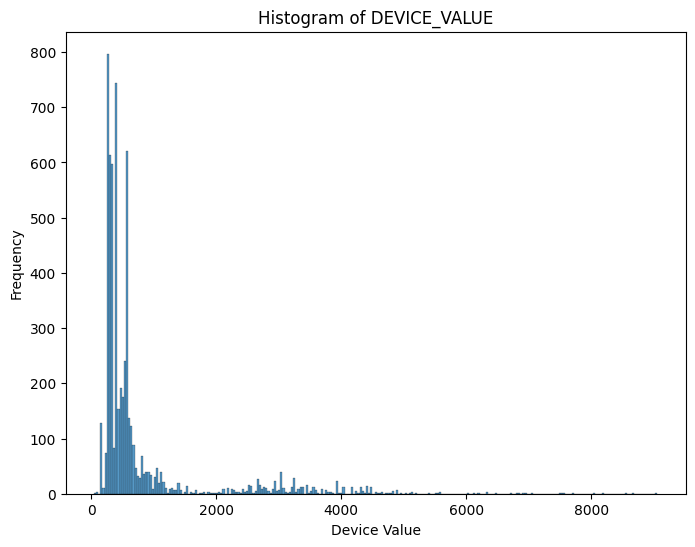

In [20]:


import matplotlib.pyplot as plt

# Histogram for DEVICE_VALUE
plt.figure(figsize=(8, 6))
sns.histplot(data=imputation_dataset, x='DEVICE_VALUE', kde=False)
plt.title('Histogram of DEVICE_VALUE')
plt.xlabel('Device Value')
plt.ylabel('Frequency')
plt.show()



The histogram for DEVICE_VALUE suggests that the distribution is unimodal but noticeably right-skewed. Most device values are concentrated towards the lower end, with a long tail reaching into higher values. This shape does not follow a symmetric normal distribution; instead, it appears more similar to a log-normal or an exponential decay, where high-value devices are less common.

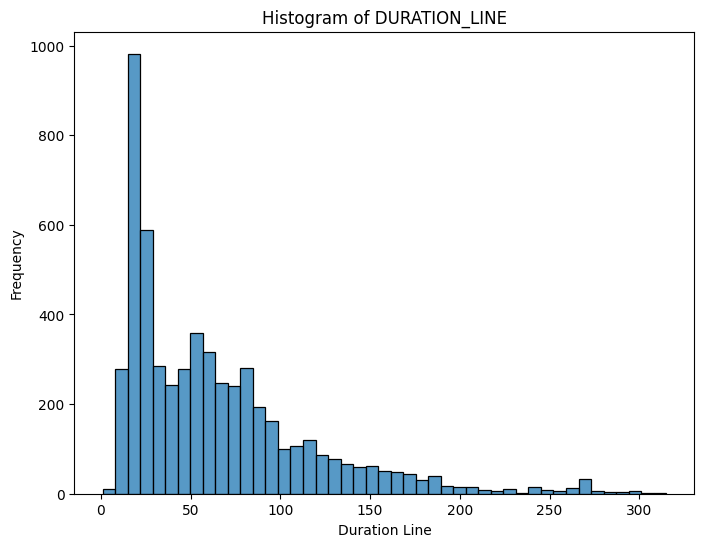

In [21]:

# Histogram for DURATION_LINE
plt.figure(figsize=(8, 6))
sns.histplot(data=imputation_dataset, x='DURATION_LINE', kde=False)
plt.title('Histogram of DURATION_LINE')
plt.xlabel('Duration Line')
plt.ylabel('Frequency')
plt.show()

The histogram for DURATION_LINE shows a unimodal distribution with a clear concentration around its median value. While the bulk of the data clusters in a specific range, there is also evidence of some outliers on the higher end, indicating moderate right-skewness. This distribution does not appear perfectly normal, and the presence of several extreme values suggests that further investigation or possible transformation might be needed if a normality assumption is important.


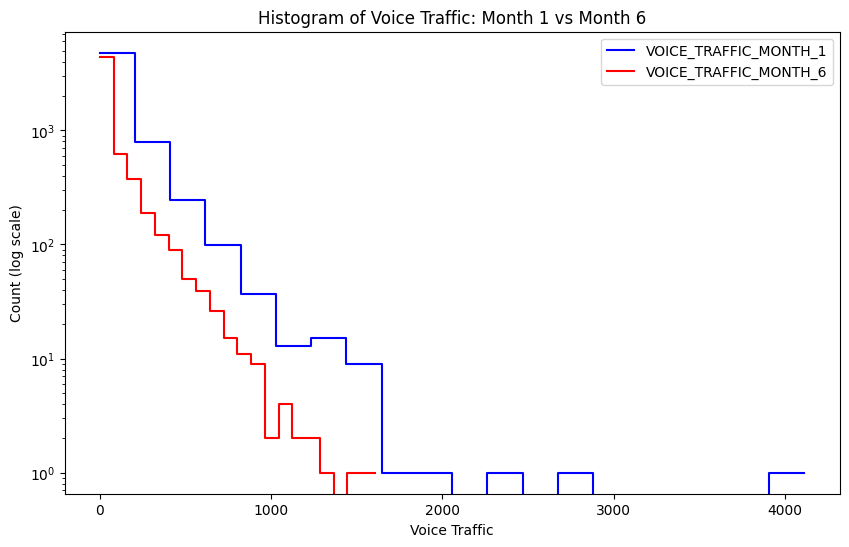

In [22]:

# Plot histogram comparing VOICE_TRAFFIC_MONTH_1 vs VOICE_TRAFFIC_MONTH_6
plt.figure(figsize=(10, 6))
sns.histplot(data=imputation_dataset, x='VOICE_TRAFFIC_MONTH_1', bins=20, color='blue', label='VOICE_TRAFFIC_MONTH_1', kde=False, stat="count", element="step", fill=False)
sns.histplot(data=imputation_dataset, x='VOICE_TRAFFIC_MONTH_6', bins=20, color='red', label='VOICE_TRAFFIC_MONTH_6', kde=False, stat="count", element="step", fill=False)
plt.yscale('log')
plt.title('Histogram of Voice Traffic: Month 1 vs Month 6')
plt.xlabel('Voice Traffic')
plt.ylabel('Count (log scale)')
plt.legend()
plt.show()


The histogram above shows the distributions of VOICE_TRAFFIC_MONTH_1 and VOICE_TRAFFIC_MONTH_6.  
Notice that we used a logarithmic scale on the y axis to better visualize differences in frequency, especially for large and small counts. The overlapping histograms (in blue and red) provide a direct comparison between month 1 and month 6.

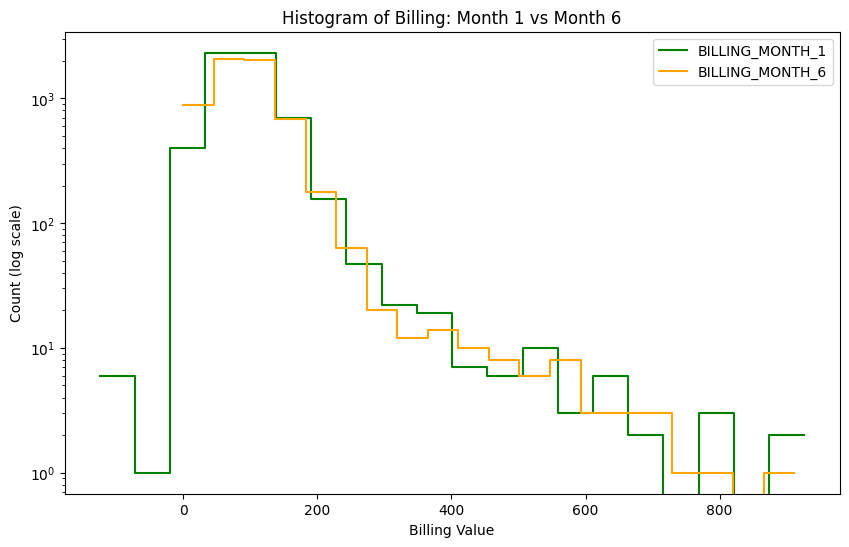

In [23]:

# Plot histogram comparing BILLING_MONTH_1 vs BILLING_MONTH_6

plt.figure(figsize=(10, 6))
sns.histplot(data=imputation_dataset, x='BILLING_MONTH_1', bins=20, color='green', label='BILLING_MONTH_1', kde=False, stat="count", element="step", fill=False)
sns.histplot(data=imputation_dataset, x='BILLING_MONTH_6', bins=20, color='orange', label='BILLING_MONTH_6', kde=False, stat="count", element="step", fill=False)
plt.yscale('log')
plt.title('Histogram of Billing: Month 1 vs Month 6')
plt.xlabel('Billing Value')
plt.ylabel('Count (log scale)')
plt.legend()
plt.show()

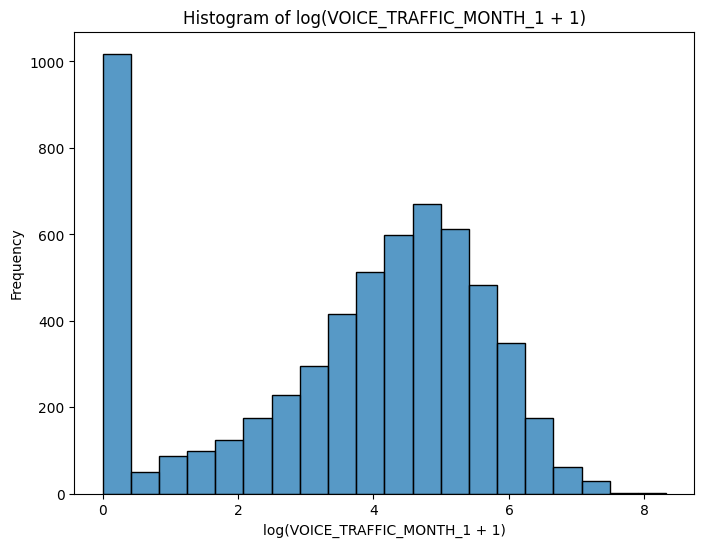

In [24]:


# Create a new transformed column using the log(x+1) function
voice_traffic_log = np.log1p(imputation_dataset['VOICE_TRAFFIC_MONTH_1'])

# Plot the histogram of the transformed variable
plt.figure(figsize=(8, 6))
sns.histplot(voice_traffic_log, bins=20, kde=False)
plt.title('Histogram of log(VOICE_TRAFFIC_MONTH_1 + 1)')
plt.xlabel('log(VOICE_TRAFFIC_MONTH_1 + 1)')
plt.ylabel('Frequency')
plt.show()


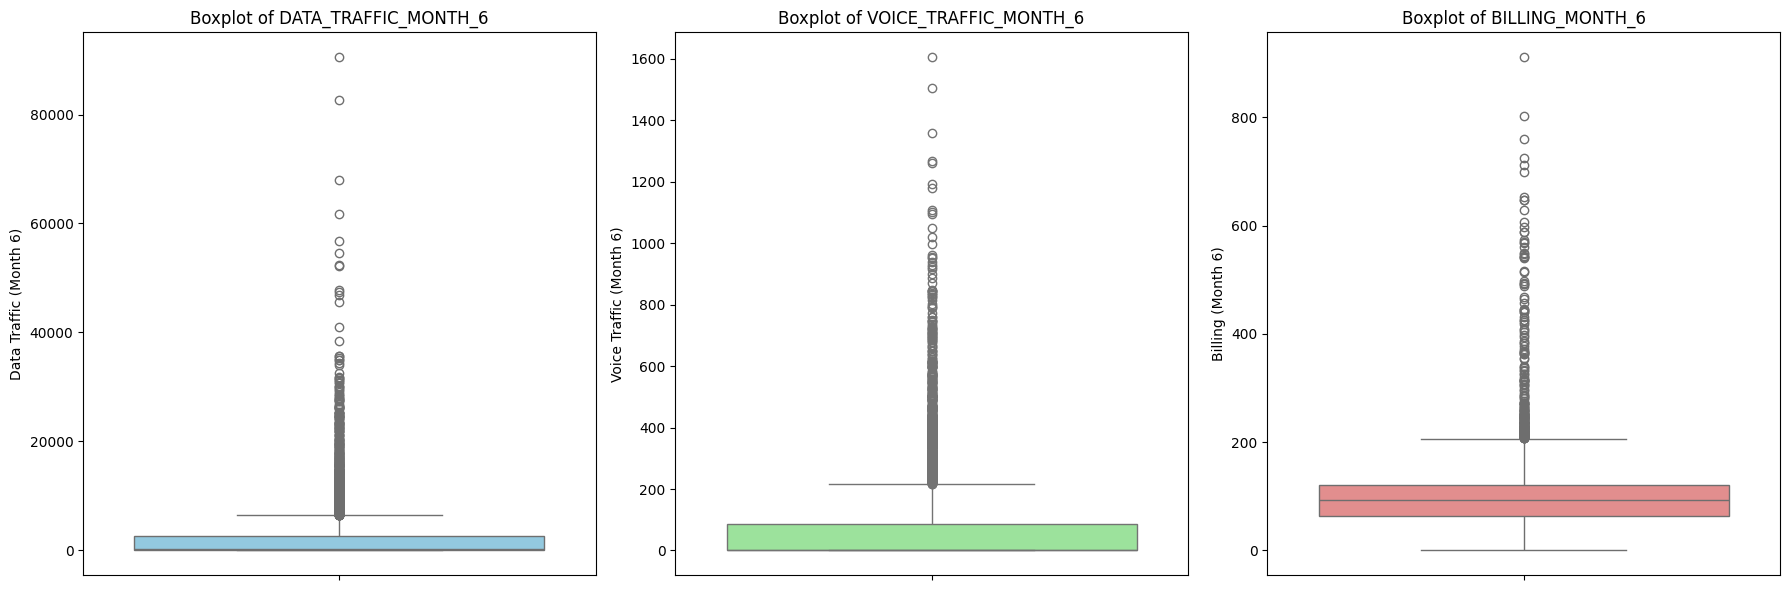

In [25]:

# Create three boxplots using subplots
import matplotlib.pyplot as plt

# Define the figure size and create a subplot with 3 axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot for DATA_TRAFFIC_MONTH_6
sns.boxplot(y=imputation_dataset["DATA_TRAFFIC_MONTH_6"], ax=axes[0], color='skyblue')
axes[0].set_title("Boxplot of DATA_TRAFFIC_MONTH_6")
axes[0].set_ylabel("Data Traffic (Month 6)")

# Boxplot for VOICE_TRAFFIC_MONTH_6
sns.boxplot(y=imputation_dataset["VOICE_TRAFFIC_MONTH_6"], ax=axes[1], color='lightgreen')
axes[1].set_title("Boxplot of VOICE_TRAFFIC_MONTH_6")
axes[1].set_ylabel("Voice Traffic (Month 6)")

# Boxplot for BILLING_MONTH_6
sns.boxplot(y=imputation_dataset["BILLING_MONTH_6"], ax=axes[2], color='lightcoral')
axes[2].set_title("Boxplot of BILLING_MONTH_6")
axes[2].set_ylabel("Billing (Month 6)")

plt.tight_layout()
plt.show()


Based on a visual inspection of the box plots, one typical strategy is to flag values outside the 1.5×IQR (interquartile range) as potential outliers. For these three variables, you might comment as follows:

• For DATA_TRAFFIC_MONTH_6, the bulk of the data is concentrated within a relatively narrow range (with the median around 1,200–1,300) while a few cases reach tens of thousands. In practice, you might set the upper threshold at Q3 + 1.5×IQR (for example, if Q3 ≈ 1,800 and IQR ≈ 800, the threshold would be around 1,800 + 1,200 = 3,000). Values far above that level could be considered outliers.

• For VOICE_TRAFFIC_MONTH_6, the median appears very low (around 6) with many values near zero, but there is a long tail of higher values. Although many observations are low, a few extreme values may exist (for example, if Q3 is around 15 and the IQR is 10, then 15 + 1.5×10 = 30 could serve as an upper threshold). Data points above that threshold would be candidates for further inspection as outliers.

• For BILLING_MONTH_6, the majority of values cluster around the mid-90s (with a median close to 95), but again there are some cases that extend to over 1,000. Using the box plot you could estimate an upper limit (say, if Q3 ≈ 100 and IQR ≈ 10–15, a threshold might be around 115–125). Values beyond this range should be carefully reviewed.

In summary, using the 1.5×IQR rule on these box plots provides a systematic starting point. However, because the distributions are highly skewed, it may be advisable to review and adjust these thresholds in the context of your domain knowledge before deciding which values to treat as outliers.

Correlation Matrix:


,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,...,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,DURATION_LINE,DEVICE_VALUE
DATA_TRAFFIC_MONTH_1,1.00,0.76,0.73,0.70,0.66,0.62,0.09,0.07,0.07,0.07,...,0.19,0.19,0.01,0.05,0.08,0.08,0.08,0.08,-0.01,0.12
DATA_TRAFFIC_MONTH_2,0.76,1.00,0.97,0.79,0.76,0.69,0.08,0.08,0.08,0.07,...,0.19,0.20,0.01,0.05,0.06,0.07,0.07,0.07,0.01,0.11
DATA_TRAFFIC_MONTH_3,0.73,0.97,1.00,0.81,0.77,0.70,0.08,0.08,0.08,0.07,...,0.19,0.20,0.01,0.05,0.06,0.07,0.07,0.07,0.01,0.12
DATA_TRAFFIC_MONTH_4,0.70,0.79,0.81,1.00,0.83,0.72,0.09,0.09,0.09,0.09,...,0.21,0.22,0.01,0.05,0.07,0.07,0.07,0.07,-0.02,0.12
DATA_TRAFFIC_MONTH_5,0.66,0.76,0.77,0.83,1.00,0.80,0.09,0.09,0.10,0.09,...,0.21,0.22,0.01,0.03,0.07,0.06,0.06,0.06,0.00,0.13
DATA_TRAFFIC_MONTH_6,0.62,0.69,0.70,0.72,0.80,1.00,0.08,0.08,0.08,0.08,...,0.19,0.20,0.01,0.05,0.09,0.07,0.07,0.08,0.00,0.12
VOICE_TRAFFIC_MONTH_1,0.09,0.08,0.08,0.09,0.09,0.08,1.00,0.82,0.80,0.74,...,0.13,0.14,-0.01,0.00,0.01,0.00,0.01,0.01,0.02,0.02
VOICE_TRAFFIC_MONTH_2,0.07,0.08,0.08,0.09,0.09,0.08,0.82,1.00,0.98,0.83,...,0.11,0.12,-0.01,0.00,-0.00,0.00,0.00,0.00,0.03,0.03
VOICE_TRAFFIC_MONTH_3,0.07,0.08,0.08,0.09,0.10,0.08,0.80,0.98,1.00,0.85,...,0.11,0.12,-0.01,0.01,-0.00,0.00,0.00,0.01,0.03,0.03
VOICE_TRAFFIC_MONTH_4,0.07,0.07,0.07,0.09,0.09,0.08,0.74,0.83,0.85,1.00,...,0.12,0.12,-0.01,0.01,0.01,-0.00,-0.00,0.01,0.02,0.02


<Figure size 2200x2000 with 0 Axes>

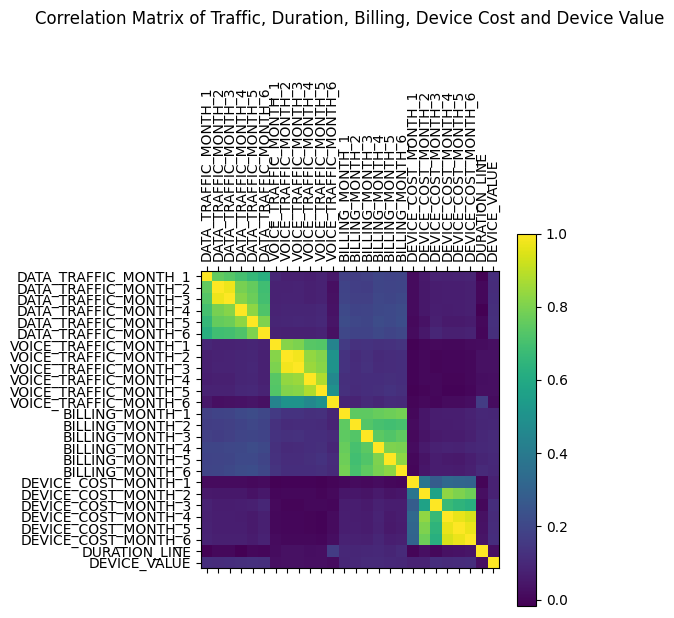

In [26]:
# List of columns to include in the correlation analysis
corr_cols = (
  [f"DATA_TRAFFIC_MONTH_{i}" for i in range(1, 7)] +
  [f"VOICE_TRAFFIC_MONTH_{i}" for i in range(1, 7)] +
  [f"BILLING_MONTH_{i}" for i in range(1, 7)] +
  [f"DEVICE_COST_MONTH_{i}" for i in range(1, 7)] +
  ["DURATION_LINE", "DEVICE_VALUE"]
)

# Calculate the Pearson correlation matrix for the selected columns
corr_matrix = imputation_dataset[corr_cols].corr(method='pearson')

# Display the correlation matrix as a table
print("Correlation Matrix:")
display(corr_matrix)

# Plot the correlation matrix using matshow
plt.figure(figsize=(22, 20))
plt.matshow(corr_matrix)
plt.title("Correlation Matrix of Traffic, Duration, Billing, Device Cost and Device Value", pad=40)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


## 2.3. Date management and period calculation

In [27]:
import datetime

# Get the maximum value from the LAST_DEVICE_CHANGE column (ignoring NaN)
max_change = imputation_dataset['LAST_DEVICE_CHANGE'].max()

# Convert the float value (e.g., 20190501.0) to an integer then to a string
max_change_str = str(int(max_change))

# Use datetime.datetime.strptime to parse the string into a datetime object
latest_change = datetime.datetime.strptime(max_change_str, "%Y%m%d")

# Display latest_change
print(latest_change)

2019-05-01 00:00:00


In [28]:
#Add 30 days using datetime.timedelta
thirty_days = datetime.timedelta(days=30)
thirty_days_later = latest_change + thirty_days

# Display the result
print(thirty_days_later)

2019-05-31 00:00:00


In [29]:
print(latest_change)
print(thirty_days_later)

2019-05-01 00:00:00
2019-05-31 00:00:00


In [30]:
import pandas as pd
import datetime

# Define the now variable. You can use a fixed date or the current datetime.
# Fixed date example:
now = datetime.datetime(2019, 5, 31)
# Alternatively, to use the current date and time:
# now = datetime.datetime.now()

# Convert LAST_DEVICE_CHANGE values to datetime.
converted_dates = pd.to_datetime(
    imputation_dataset['LAST_DEVICE_CHANGE'].astype('Int64').astype(str),
    format='%Y%m%d',
    errors='coerce'
)

# Calculate the difference between now and each date, in periods of 30 days.
month_differences = (now - converted_dates) / pd.Timedelta(days=30)

# Replace MONTHS_LAST_DEVICE with the computed differences.
imputation_dataset['MONTHS_LAST_DEVICE'] = month_differences.fillna(0).astype(int)

# Display the first few values to verify the update.
print(imputation_dataset['MONTHS_LAST_DEVICE'].head())


0     0
1    26
2     0
3    20
4     5
Name: MONTHS_LAST_DEVICE, dtype: int32


In [31]:
# Convert LINE_ACTIVATION_DATE to datetime, handling NaN values
activation_dates = pd.to_datetime(
	imputation_dataset['LINE_ACTIVATION_DATE'].fillna(0).astype('Int64').astype(str).replace('0', pd.NaT), 
	format='%Y%m%d',
	errors='coerce'
)

# Calculate difference in days between now and activation date
days_difference = (now - activation_dates).dt.days

# Update DURATION_LINE with the new values
imputation_dataset['DURATION_LINE'] = days_difference

# Calculate and display the average duration in years (excluding NaN values)
avg_duration_years = imputation_dataset['DURATION_LINE'].dropna().mean() / 365
print(f"Average duration: {avg_duration_years:.2f} years")

Average duration: 5.34 years



## 2.4. Standarization and scaling of numerical variables

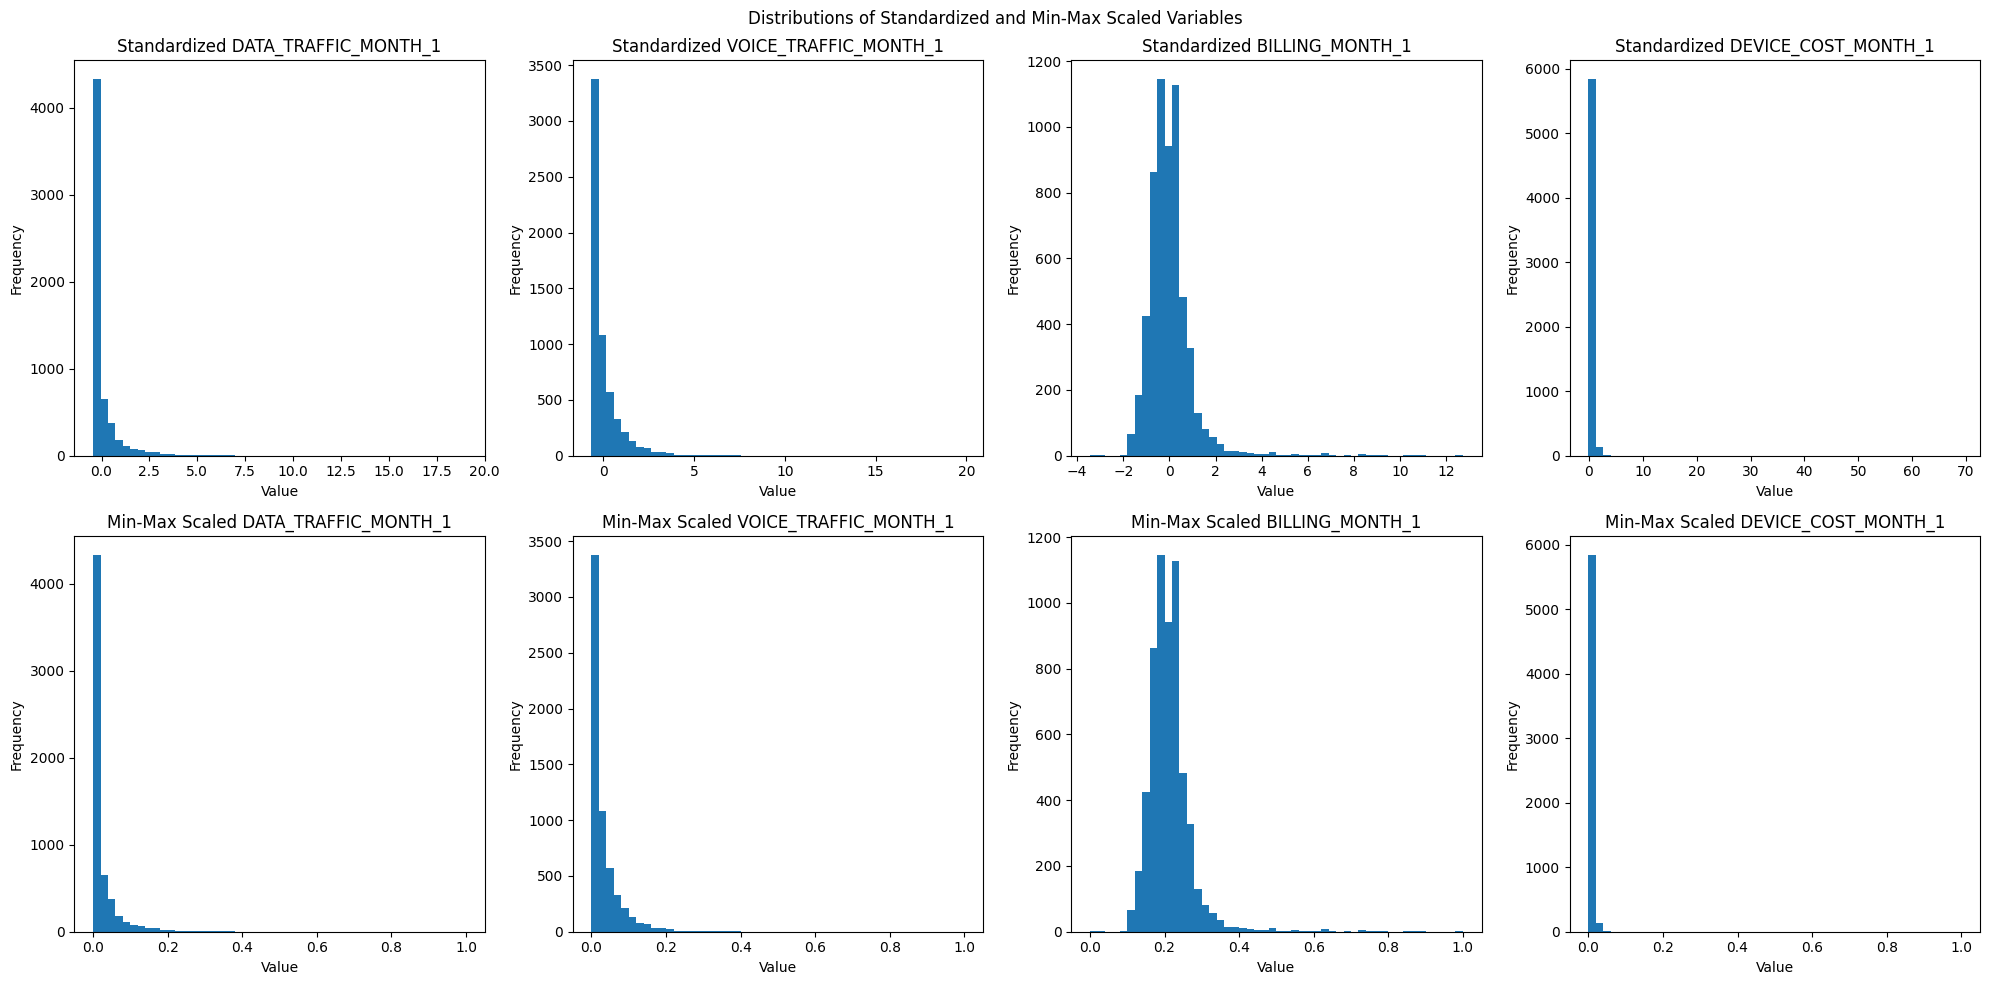

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import required scalers

# Create scalers
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# List of columns to transform
cols_to_transform = [
  'DATA_TRAFFIC_MONTH_1', 
  'VOICE_TRAFFIC_MONTH_1',
  'BILLING_MONTH_1',
  'DEVICE_COST_MONTH_1'
]

# Perform standardization
for col in cols_to_transform:
  new_col = f"{col}_STANDARD"
  imputation_dataset[new_col] = std_scaler.fit_transform(imputation_dataset[[col]])

# Perform min-max scaling
for col in cols_to_transform:
  new_col = f"{col}_MINMAX"
  imputation_dataset[new_col] = minmax_scaler.fit_transform(imputation_dataset[[col]])

# Create subplots for histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distributions of Standardized and Min-Max Scaled Variables')

# Plot standardized variables
for idx, col in enumerate(cols_to_transform):
  std_col = f"{col}_STANDARD"
  axes[0, idx].hist(imputation_dataset[std_col], bins=50)
  axes[0, idx].set_title(f'Standardized {col}')
  axes[0, idx].set_xlabel('Value')
  axes[0, idx].set_ylabel('Frequency')

# Plot min-max scaled variables
for idx, col in enumerate(cols_to_transform):
  minmax_col = f"{col}_MINMAX"
  axes[1, idx].hist(imputation_dataset[minmax_col], bins=50)
  axes[1, idx].set_title(f'Min-Max Scaled {col}')
  axes[1, idx].set_xlabel('Value')
  axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2.5. Convert categorical columns to dummy binary variables

In [33]:
# Create LabelEncoder object
label_encoder = LabelEncoder()

# Create new column with integer encoded brand values
imputation_dataset['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = label_encoder.fit_transform(imputation_dataset['PREVIOUS_DEVICE_BRAND'])

# Display mapping of brands to integers
brand_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Brand to integer mapping:")
for brand, value in brand_mapping.items():
  print(f"{brand}: {value}")

Brand to integer mapping:
Apple: 0
LG: 1
Motorola: 2
Outros: 3
Samsung: 4


In [34]:
# Convert PREVIOUS_DEVICE_MANUF to dummy variables using pd.get_dummies()
manufacturer_dummies = pd.get_dummies(imputation_dataset['PREVIOUS_DEVICE_MANUF'], prefix='manuf')

# Join the dummy variables to the original dataframe
imputation_dataset = imputation_dataset.join(manufacturer_dummies)

# Display the first few rows of the dummy variables
print("Shape of dummy variables dataframe:", manufacturer_dummies.shape)
print("\nFirst few rows of dummy variables:")
display(manufacturer_dummies.head())




Shape of dummy variables dataframe: (5988, 67)

First few rows of dummy variables:


,manuf_ASUSTek Computer Inc,manuf_Apple Inc,manuf_BLU Products Inc,manuf_Beijing Flyscale Technologies Company Limited,manuf_BlackBerry Limited,manuf_Bullitt Group Limited,manuf_CT Asia (HK) Ltd,manuf_D-Link Corporation,manuf_DG HomTom Group Co Limited,manuf_DL Comercio e Industria de Produtos Eletronic,...,manuf_Telit Communications SpA,manuf_Topmax Glory Limited,manuf_Umi Network Technology Co Limited,manuf_United Mobile,manuf_United Time Hong Kong Ltd,manuf_Vikin Communication Technology Co Limited,manuf_Vogtec (H.K) Co Ltd,manuf_Xiaomi Communications Co Ltd,manuf_ZTE Corporation,manuf_u-blox AG
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 2.6. Feature generation

In [35]:
# Dictionary mapping feature groups to their respective columns
columns_to_aggregate = {
    'DATA_TRAFFIC': ['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 
                     'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6'],
    'VOICE_TRAFFIC': ['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 
                      'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6'],
    'BILLING': ['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 
                'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6'],
    'DEVICE_COST': ['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 
                    'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']
}

# For each feature group (e.g., DATA_TRAFFIC, VOICE_TRAFFIC, etc.)
for key, columns in columns_to_aggregate.items():
    # Calculate and store mean value across all months
    imputation_dataset[f'{key}_MEAN'] = imputation_dataset[columns].mean(axis=1)
    # Calculate and store maximum value across all months
    imputation_dataset[f'{key}_MAX'] = imputation_dataset[columns].max(axis=1)
    # Calculate and store minimum value across all months
    imputation_dataset[f'{key}_MIN'] = imputation_dataset[columns].min(axis=1)
    # Calculate and store range (max - min) across all months
    imputation_dataset[f'{key}_RANGE'] = imputation_dataset[f'{key}_MAX'] - imputation_dataset[f'{key}_MIN']

# Display the first few rows of the updated dataset
imputation_dataset.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,21.80,57.90,92.96,107.93,85.00,22.93,12.00,12.00,12.00,0.00
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.50,4.40,49.44,56.56,47.00,9.56,0.00,0.00,0.00,0.00
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,26.10,192.60,121.78,129.14,113.77,15.37,0.00,0.00,0.00,0.00
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,119.00,112.20,58.22,60.93,55.99,4.94,6.00,6.00,6.00,0.00
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,383.90,109.70,110.69,107.99,2.70,0.00,0.00,0.00,0.00


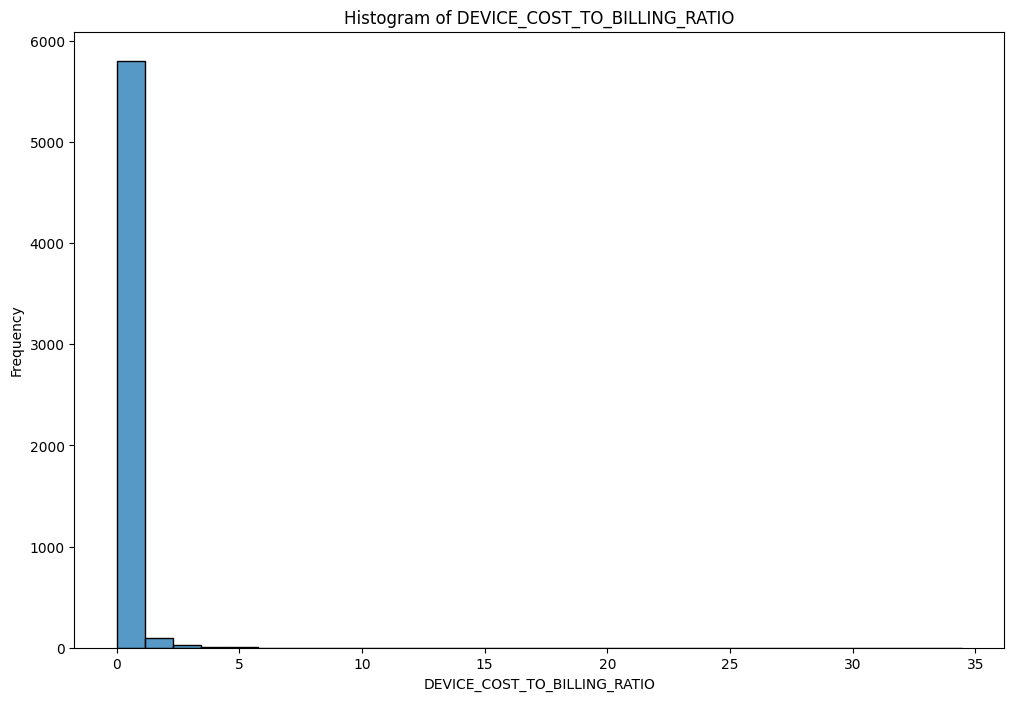

In [36]:
imputation_dataset['DEVICE_COST_TO_BILLING_RATIO'] = imputation_dataset['DEVICE_COST_MEAN'] / imputation_dataset['BILLING_MEAN']
plt.figure(figsize=(12, 8))
ax = sns.histplot(imputation_dataset['DEVICE_COST_TO_BILLING_RATIO'], bins=30, kde=False)
ax.set(title='Histogram of DEVICE_COST_TO_BILLING_RATIO', xlabel='DEVICE_COST_TO_BILLING_RATIO', ylabel='Frequency')
plt.show()

In [37]:
# The distribution of DEVICE_COST_TO_BILLING_RATIO shows a highly right-skewed (positively skewed) distribution, with the following key characteristics:

# 1. Most ratios are concentrated near zero, indicating that device costs are typically much lower than billing amounts for the majority of customers

# 2. There is a long right tail extending to higher ratio values, representing cases where device costs are comparable to or exceed billing amounts

# 3. The use of a logarithmic scale on the y-axis helps visualize the full range of frequencies, revealing that the distribution approximately follows a log-normal pattern

# 4. There appear to be some outliers with very high ratios, likely representing special cases where device costs were unusually high relative to billing

## 2.7. Text parsing/processing

In [38]:
# Split PURCHASED_DEVICE string into two parts at the first underscore
# Example: "TGLG29462000_LG X410BCW SMARTPHONE PRETO PPB/P1769/07" 
# becomes ['TGLG29462000', 'LG X410BCW SMARTPHONE PRETO PPB/P1769/07']
device_components_new = imputation_dataset['PURCHASED_DEVICE'].str.split('_', n=1, expand=True)

# Extract the unique code (first part before underscore) into a new column
# Example: 'TGLG29462000'
imputation_dataset['PURCHASED_DEVICE_UNIQUE_CODE'] = device_components_new[0]

# Split the second part (after underscore) into manufacturer and model at the first space
# Example: 'LG X410BCW SMARTPHONE PRETO PPB/P1769/07'
# becomes ['LG', 'X410BCW SMARTPHONE PRETO PPB/P1769/07']
remaining_parts_new = device_components_new[1].str.split(' ', n=1, expand=True)

# Extract manufacturer name into a new column (first word after underscore)
# Example: 'LG'
imputation_dataset['PURCHASED_DEVICE_UNIQUE_MANUFACTURER'] = remaining_parts_new[0]

# Extract model details into a new column (everything after manufacturer)
# Example: 'X410BCW SMARTPHONE PRETO PPB/P1769/07'
imputation_dataset['PURCHASED_DEVICE_UNIQUE_MODEL'] = remaining_parts_new[1]

# Display the first few rows of the updated dataset
imputation_dataset.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_UNIQUE_CODE,PURCHASED_DEVICE_UNIQUE_MANUFACTURER,PURCHASED_DEVICE_UNIQUE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,85.00,22.93,12.00,12.00,12.00,0.00,0.13,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,47.00,9.56,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,113.77,15.37,0.00,0.00,0.00,0.00,0.00,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,55.99,4.94,6.00,6.00,6.00,0.00,0.10,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,107.99,2.70,0.00,0.00,0.00,0.00,0.00,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO


In [39]:
# Get frequency counts of manufacturers for purchased devices
purchased_device_manufacturer_census = imputation_dataset['PURCHASED_DEVICE_UNIQUE_MANUFACTURER'].value_counts().reset_index()
purchased_device_manufacturer_census.columns = ['PURCHASED_DEVICE_UNIQUE_MANUFACTURER', 'Frequency']
display(purchased_device_manufacturer_census)

# Get frequency counts of manufacturers for previous devices 
previous_device_manuf_census = imputation_dataset['PREVIOUS_DEVICE_MANUF'].value_counts().reset_index()
previous_device_manuf_census.columns = ['PREVIOUS_DEVICE_MANUF', 'Frequency']
display(previous_device_manuf_census)

,PURCHASED_DEVICE_UNIQUE_MANUFACTURER,Frequency
0,LG,3556
1,SAMSUNG,1094
2,MOTOROLA,630
3,APPLE,448
4,ALCATEL,258
5,ASUS,2


,PREVIOUS_DEVICE_MANUF,Frequency
0,Samsung Korea,1879
1,Apple Inc,1495
2,"Motorola Mobility LLC, a Lenovo Company",849
3,LG Electronics Inc.,506
4,TCL Communication Ltd,279
...,...,...
62,Lanxun Technology (Hong Kong) Limited,1
63,Beijing Flyscale Technologies Company Limited,1
64,Meizu Technology Co Ltd,1
65,TP-Link Technologies Co Ltd,1


## 2.8. Splitting and sampling a dataset

In [40]:
train_dataset, test_dataset = train_test_split(imputation_dataset, test_size=0.3, random_state=42)

print(f"Training dataset shape: {train_dataset.shape}")
print(f"Testing dataset shape: {test_dataset.shape}")

Training dataset shape: (4191, 129)
Testing dataset shape: (1797, 129)


In [41]:
train_stats = train_dataset[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()
print("Training Dataset Statistics:")
print(train_stats)

test_stats = test_dataset[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()
print("\nTesting Dataset Statistics:")
print(test_stats)

Training Dataset Statistics:
       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count               4191.00                4191.00          4191.00
mean                2549.41                 132.02           100.03
std                 5612.93                 203.67            65.03
min                    0.00                   0.00          -124.49
25%                    0.00                  10.20            63.36
50%                  399.50                  64.20            92.99
75%                 2842.26                 171.55           121.14
max               112421.17                4113.00           911.72

Testing Dataset Statistics:
       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count               1797.00                1797.00          1797.00
mean                2567.66                 127.12            98.42
std                 6135.75                 191.84            64.83
min                    0.00                   0.00        

# 3. Comparing iPhone and Samsung J series users

In [42]:
# Create a dataframe for Apple iPhone users
iphone_users = imputation_dataset[imputation_dataset['PREVIOUS_DEVICE_MODEL'].str.contains('iPhone', na=False)]

# Create a dataframe for Samsung J series users
samsung_j_series_users = imputation_dataset[imputation_dataset['PREVIOUS_DEVICE_MODEL'].str.contains('Samsung Galaxy J', na=False)]

display(iphone_users.head())
display(samsung_j_series_users.head())

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_UNIQUE_CODE,PURCHASED_DEVICE_UNIQUE_MANUFACTURER,PURCHASED_DEVICE_UNIQUE_MODEL
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,55.99,4.94,6.00,6.00,6.00,0.00,0.10,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.00,20170101.00,1520.21,2196.57,2196.57,1815.70,2101.68,3224.28,206.90,...,115.00,71.31,13.00,13.00,13.00,0.00,0.09,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.00,20181101.00,10789.82,10423.67,10423.67,5188.60,7379.40,6789.48,64.30,...,109.99,39.99,0.00,0.00,0.00,0.00,0.00,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI6...,3081.00,20170901.00,990.28,1011.10,1011.10,1025.97,2778.35,1822.95,102.90,...,60.99,2.96,124.00,124.00,124.00,0.00,1.98,DGAP067C2000,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
19,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,109.83,25.12,25.12,25.36,17.54,19.92,64.90,...,68.69,19.21,125.00,125.00,125.00,0.00,1.58,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_UNIQUE_CODE,PURCHASED_DEVICE_UNIQUE_MANUFACTURER,PURCHASED_DEVICE_UNIQUE_MODEL
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,47.00,9.56,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20141101.00,793.16,734.52,734.52,156.38,467.95,721.30,2.70,...,50.99,1.01,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
11,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,321.00,20170601.00,4.18,4.18,1.89,8.76,0.00,0.00,12.30,...,103.10,0.04,0.00,0.00,0.00,0.00,0.00,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
23,TGSA32564007_SAMSUNG J260M SMART PRETO PPB/PI...,633.00,20160801.00,4.53,464.09,695.10,223.33,223.33,247.85,298.00,...,45.59,24.30,2.50,15.00,0.00,15.00,0.04,TGSA32564007,SAMSUNG,J260M SMART PRETO PPB/PI324/14
27,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170701.00,3901.06,2646.63,2646.63,1239.50,1124.44,662.11,66.40,...,40.99,4.23,23.00,23.00,23.00,0.00,0.55,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


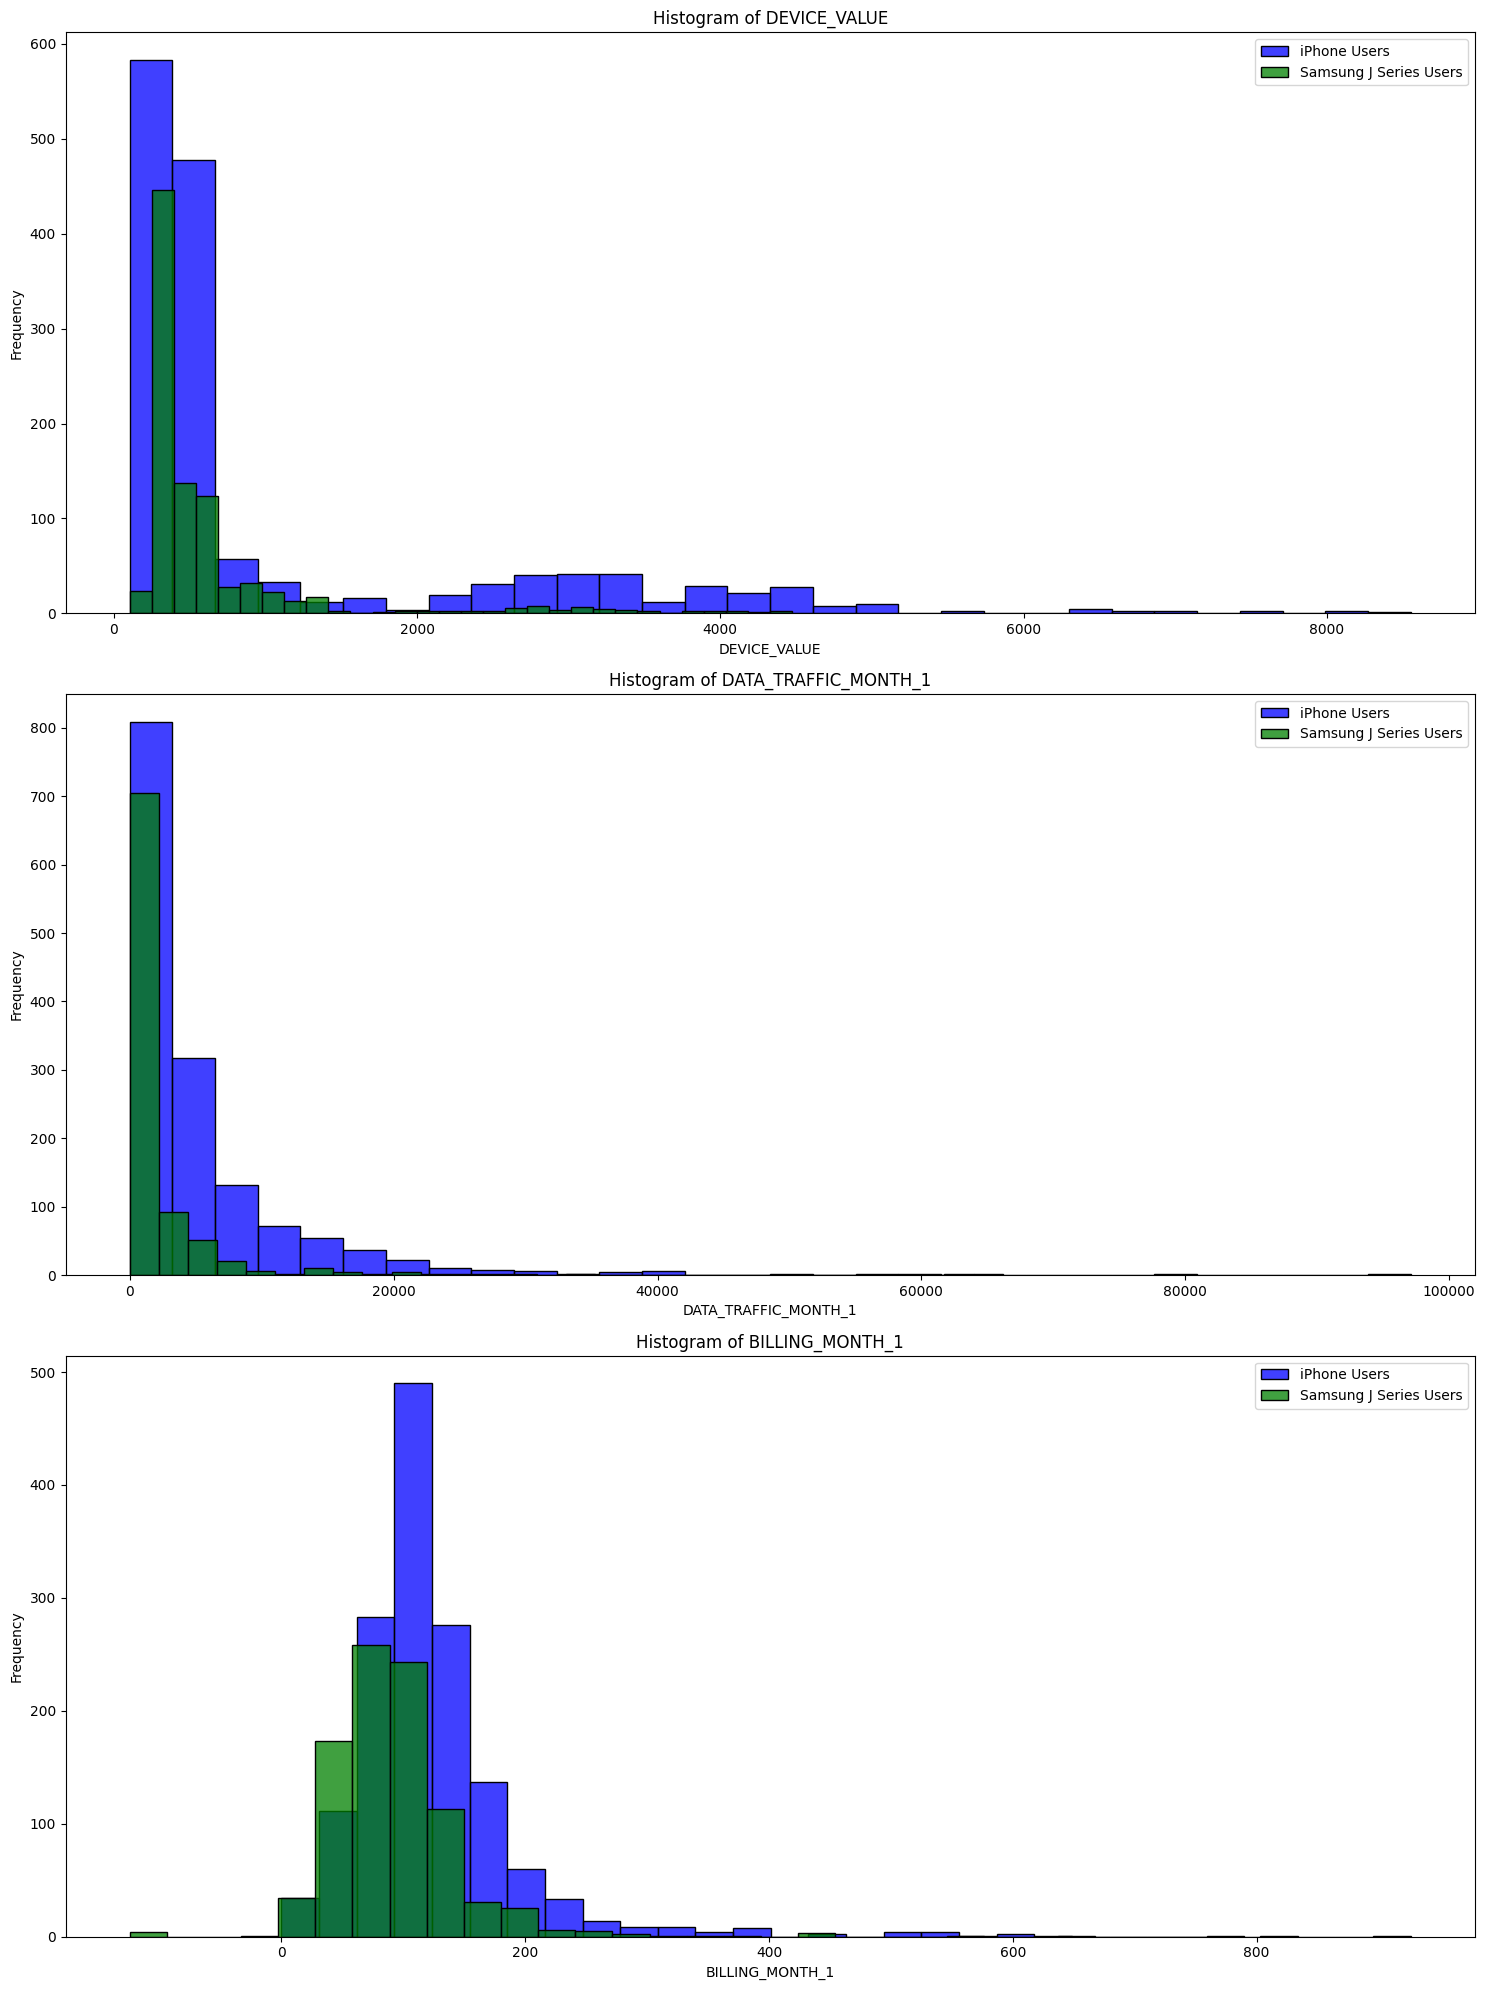

In [43]:
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

sns.histplot(iphone_users['DEVICE_VALUE'], bins=30, kde=False, color='blue', label='iPhone Users', ax=axes[0])
sns.histplot(samsung_j_series_users['DEVICE_VALUE'], bins=30, kde=False, color='green', label='Samsung J Series Users', ax=axes[0])
axes[0].set(title='Histogram of DEVICE_VALUE', xlabel='DEVICE_VALUE', ylabel='Frequency')
axes[0].legend()

sns.histplot(iphone_users['DATA_TRAFFIC_MONTH_1'], bins=30, kde=False, color='blue', label='iPhone Users', ax=axes[1])
sns.histplot(samsung_j_series_users['DATA_TRAFFIC_MONTH_1'], bins=30, kde=False, color='green', label='Samsung J Series Users', ax=axes[1])
axes[1].set(title='Histogram of DATA_TRAFFIC_MONTH_1', xlabel='DATA_TRAFFIC_MONTH_1', ylabel='Frequency')
axes[1].legend()

sns.histplot(iphone_users['BILLING_MONTH_1'], bins=30, kde=False, color='blue', label='iPhone Users', ax=axes[2])
sns.histplot(samsung_j_series_users['BILLING_MONTH_1'], bins=30, kde=False, color='green', label='Samsung J Series Users', ax=axes[2])
axes[2].set(title='Histogram of BILLING_MONTH_1', xlabel='BILLING_MONTH_1', ylabel='Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()

Data Traffic and Device Value exhibit similar histogram patterns, both reaching their highest point on the rightmost side. However, their frequencies decline rapidly as values increase. Likewise, Billing Month shows a peak at the lowest value, with iPhone users appearing more frequently than Samsung users.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a working copy of the dataset
data = imputation_dataset.copy()

# Encode the categorical features using LabelEncoder
model_encoder = LabelEncoder()
brand_encoder = LabelEncoder()
manufacturer_encoder = LabelEncoder()

data['PREVIOUS_DEVICE_MODEL_ENC'] = model_encoder.fit_transform(data['PREVIOUS_DEVICE_MODEL'])
data['PREVIOUS_DEVICE_BRAND_ENC'] = brand_encoder.fit_transform(data['PREVIOUS_DEVICE_BRAND'])
data['PURCHASED_DEVICE_MANUFACTURER_ENC'] = manufacturer_encoder.fit_transform(
    data['PURCHASED_DEVICE_UNIQUE_MANUFACTURER']
)

# Remove rows with missing values in the necessary columns
data.dropna(subset=[
    'PREVIOUS_DEVICE_MODEL_ENC',
    'PREVIOUS_DEVICE_BRAND_ENC',
    'MONTHS_LAST_DEVICE',
    'PURCHASED_DEVICE_MANUFACTURER_ENC'
], inplace=True)

# -------------------------------
# Model with 3 features
# -------------------------------

# Define features and target for the 3-variable model
features_3 = data[['PREVIOUS_DEVICE_MODEL_ENC', 'PREVIOUS_DEVICE_BRAND_ENC', 'MONTHS_LAST_DEVICE']]
target = data['PURCHASED_DEVICE_MANUFACTURER_ENC']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(features_3, target, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree classifier
dt_classifier_3 = DecisionTreeClassifier(random_state=42)
dt_classifier_3.fit(X_train, y_train)

# Make predictions and calculate the accuracy
predictions_3 = dt_classifier_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, predictions_3)
print(f"3 variables model ACCURACY: {accuracy_3:.2f}")

# -------------------------------
# Model with 5 features
# -------------------------------

# Define the extended feature set by including 'DEVICE_VALUE' and 'DURATION_LINE'
features_5 = data[['PREVIOUS_DEVICE_MODEL_ENC', 'PREVIOUS_DEVICE_BRAND_ENC', 'MONTHS_LAST_DEVICE', 'DEVICE_VALUE', 'DURATION_LINE']]

# Split the extended feature set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_5, target, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree classifier for the 5-variable model
dt_classifier_5 = DecisionTreeClassifier(random_state=42)
dt_classifier_5.fit(X_train, y_train)

# Make predictions and compute the accuracy for the extended model
predictions_5 = dt_classifier_5.predict(X_test)
accuracy_5 = accuracy_score(y_test, predictions_5)
print(f"5 variables model ACCURACY: {accuracy_5:.2f}")


3 variables model ACCURACY: 0.50
5 variables model ACCURACY: 0.84


Trying to make the model better by hyperparameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'data' is already prepared as in the previous code block
# Define the feature set and target variable
features = data[['PREVIOUS_DEVICE_MODEL_ENC', 'PREVIOUS_DEVICE_BRAND_ENC', 'MONTHS_LAST_DEVICE', 'DEVICE_VALUE', 'DURATION_LINE']]
target = data['PURCHASED_DEVICE_MANUFACTURER_ENC']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define a grid of hyperparameters for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print out the best hyperparameters and best cross-validation score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test set accuracy of the best model: {:.2f}".format(test_accuracy))


c:\Users\rojgi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation accuracy: 0.83
Test set accuracy of the best model: 0.81


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>

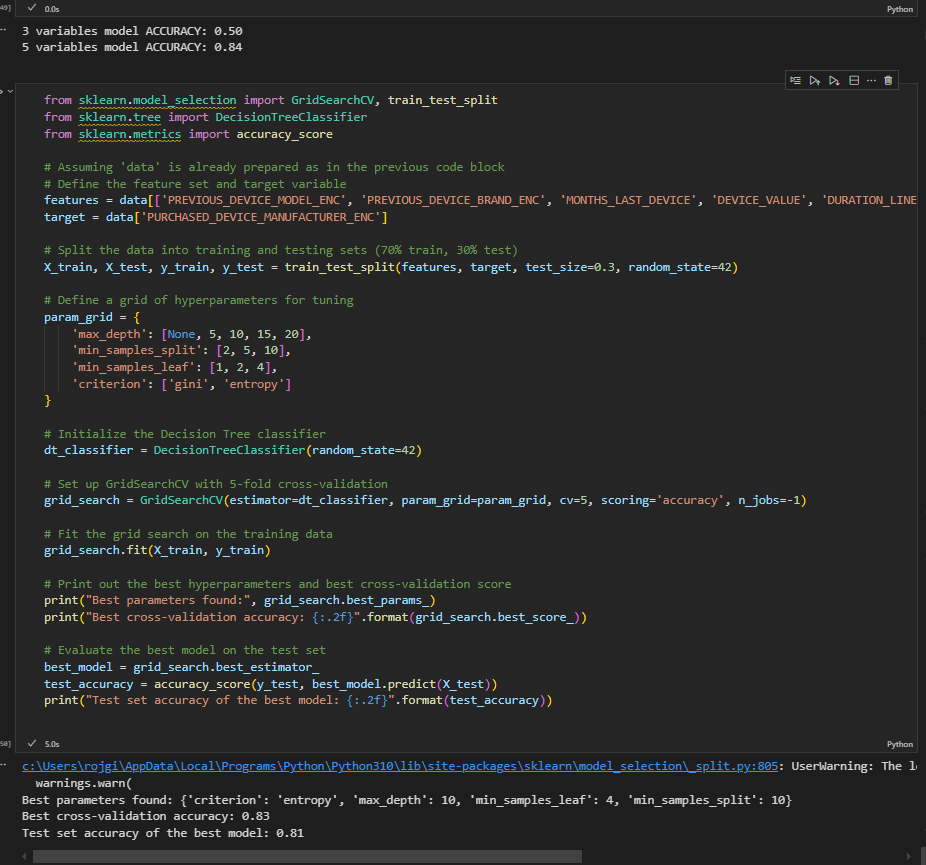